
# Final Portfolio Assessment
## Classification Task

**Student Name:** Sachin Shrestha  
**Student ID:** 2461983  



#Task 1: Exploratory Data Analysis and Data Understanding

In [8]:

import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/credit_risk_dataset.csv")

print("Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumns:", df.columns.tolist())


Shape: (32581, 12)

First 5 rows:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                       

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



##  Detailed Description of Dataset

### a. When and by whom the dataset was created
The dataset was published by Kaggle user laotse on the Kaggle platform. It is a credit risk dataset created for educational and research purposes. The exact original data collection date is not specified.
### b. How and from where the dataset was accessed
The dataset was accessed from kaggle as a CSV file and used directly for this assignment in 2026.

### c. Justification of alignment with the selected UNSDG
This dataset aligns with **UNSDG 1 – No Poverty** by enabling fair credit risk assessment, supporting responsible lending decisions, and promoting financial stability, which reduces the risk of individuals falling into poverty due to unsustainable debt.

### d. Attributes Description
- Demographic features: age, employment, income
- Financial features: loan amount, credit history, interest rate
- Target: **loan_status** (0 = Non-default, 1 = Default)



#Meaningful Questions the Dataset Can Answer

1. Which financial attributes are most important in predicting loan default?

    The dataset helps identify key factors such as loan amount, interest rate, income, credit history, and employment length that strongly influence whether a borrower will default.

2. Can machine learning models accurately classify borrowers into default and non-default categories?

    Yes, machine learning models can effectively classify borrowers into default and non-default categories with high accuracy using the available financial features.



##  Assessing Dataset Quality


In [10]:

print("1. MISSING VALUES CHECK")

missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")


print("\n2. CLASS IMBALANCE CHECK")

class_counts = df['loan_status'].value_counts()
print("Class distribution:")
print(class_counts)

print("\nClass percentages:")
print((class_counts / len(df) * 100).round(2))

print("\n3. DATA RELEVANCE CHECK")

print("All features are relevant for credit risk prediction:")
print("- Personal attributes: age, employment length")
print("- Financial attributes: income, loan amount, interest rate")
print("- Credit attributes: loan grade, credit history")
print("- Target variable: loan_status (default / non-default)")


print("4. NOISE & OUTLIERS CHECK")

print("Basic statistics:")
print(df.describe().round(2))

print("\nPotential outliers (values beyond 3 standard deviations):")
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    mean = df[col].mean()
    std = df[col].std()
    outliers = df[(df[col] < mean - 3*std) | (df[col] > mean + 3*std)]
    if len(outliers) > 0:
        print(f"{col}: {len(outliers)} outliers")






1. MISSING VALUES CHECK
Missing values per column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Total missing values: 4011

2. CLASS IMBALANCE CHECK
Class distribution:
loan_status
0    25473
1     7108
Name: count, dtype: int64

Class percentages:
loan_status
0    78.18
1    21.82
Name: count, dtype: float64

3. DATA RELEVANCE CHECK
All features are relevant for credit risk prediction:
- Personal attributes: age, employment length
- Financial attributes: income, loan amount, interest rate
- Credit attributes: loan grade, credit history
- Target variable: loan_status (default / non-default)
4. NOISE & OU

##Exploratory Data Analysis (EDA)

In [11]:
import pandas as pd
import numpy as np


print("DATA CLEANING & SUMMARY STATISTICS")

df_clean = df.copy()
print(f"Dataset shape: {df_clean.shape}")

# Summary statistics (numeric features only)
print("\nSummary Statistics:")
print(df_clean.describe().round(2))

# Check data types
print("\nData Types:")
print(df_clean.dtypes)

# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Delete duplicate rows
df = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df.shape}")

# Checking person age
age_high = df[df['person_age'] > 100]
age_low  = df[df['person_age'] < 18]

print("\nPerson Age > 100:")
if len(age_high) == 0:
    print("No age values above 100 found.")
else:
    print(f"Found {len(age_high)} entries with age > 100:")
    display(age_high)

print("\nPerson Age < 18:")
if len(age_low) == 0:
    print("No age values below 18 found.")
else:
    print(f"Found {len(age_low)} entries with age < 18:")
    display(age_low)

# Deleting person age if age > 100
num_removed = df[df['person_age'] > 100].shape[0]
df = df[df['person_age'] <= 100]

print(f"\nRemoved {num_removed} rows where person_age > 100")
print(f"New dataset shape: {df.shape}")

# Check for impossible employment lengths
emp_outliers = df[df['person_emp_length'] > 60]

print("\nPerson Employment Length > 60:")
if len(emp_outliers) == 0:
    print("No impossible employment lengths found.")
else:
    print(f"Found {len(emp_outliers)} entries with employment length > 60:")
    display(emp_outliers)

# Remove rows with impossible employment lengths
df_clean = df[df['person_emp_length'] <= 60].copy()

print(f"\nDataset shape after removing impossible employment lengths: {df_clean.shape}")

# Check for person_income less than 4000
low_income_outliers = df[df['person_income'] < 4000]

print("\nPerson Income < 4000:")
if len(low_income_outliers) == 0:
    print("No entries with income below 4000 found.")
else:
    print(f"Found {len(low_income_outliers)} entries with income < 4000:")
    display(low_income_outliers)




DATA CLEANING & SUMMARY STATISTICS
Dataset shape: (32581, 12)

Summary Statistics:
       person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
count    32581.00       32581.00           31686.00   32581.00       29465.00   
mean        27.73       66074.85               4.79    9589.37          11.01   
std          6.35       61983.12               4.14    6322.09           3.24   
min         20.00        4000.00               0.00     500.00           5.42   
25%         23.00       38500.00               2.00    5000.00           7.90   
50%         26.00       55000.00               4.00    8000.00          10.99   
75%         30.00       79200.00               7.00   12200.00          13.47   
max        144.00     6000000.00             123.00   35000.00          23.22   

       loan_status  loan_percent_income  cb_person_cred_hist_length  
count     32581.00             32581.00                    32581.00  
mean          0.22                 0.17        

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25



Person Age < 18:
No age values below 18 found.

Removed 5 rows where person_age > 100
New dataset shape: (32411, 12)

Person Employment Length > 60:
Found 2 entries with employment length > 60:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4



Dataset shape after removing impossible employment lengths: (31522, 12)

Person Income < 4000:
No entries with income below 4000 found.


#Visualization

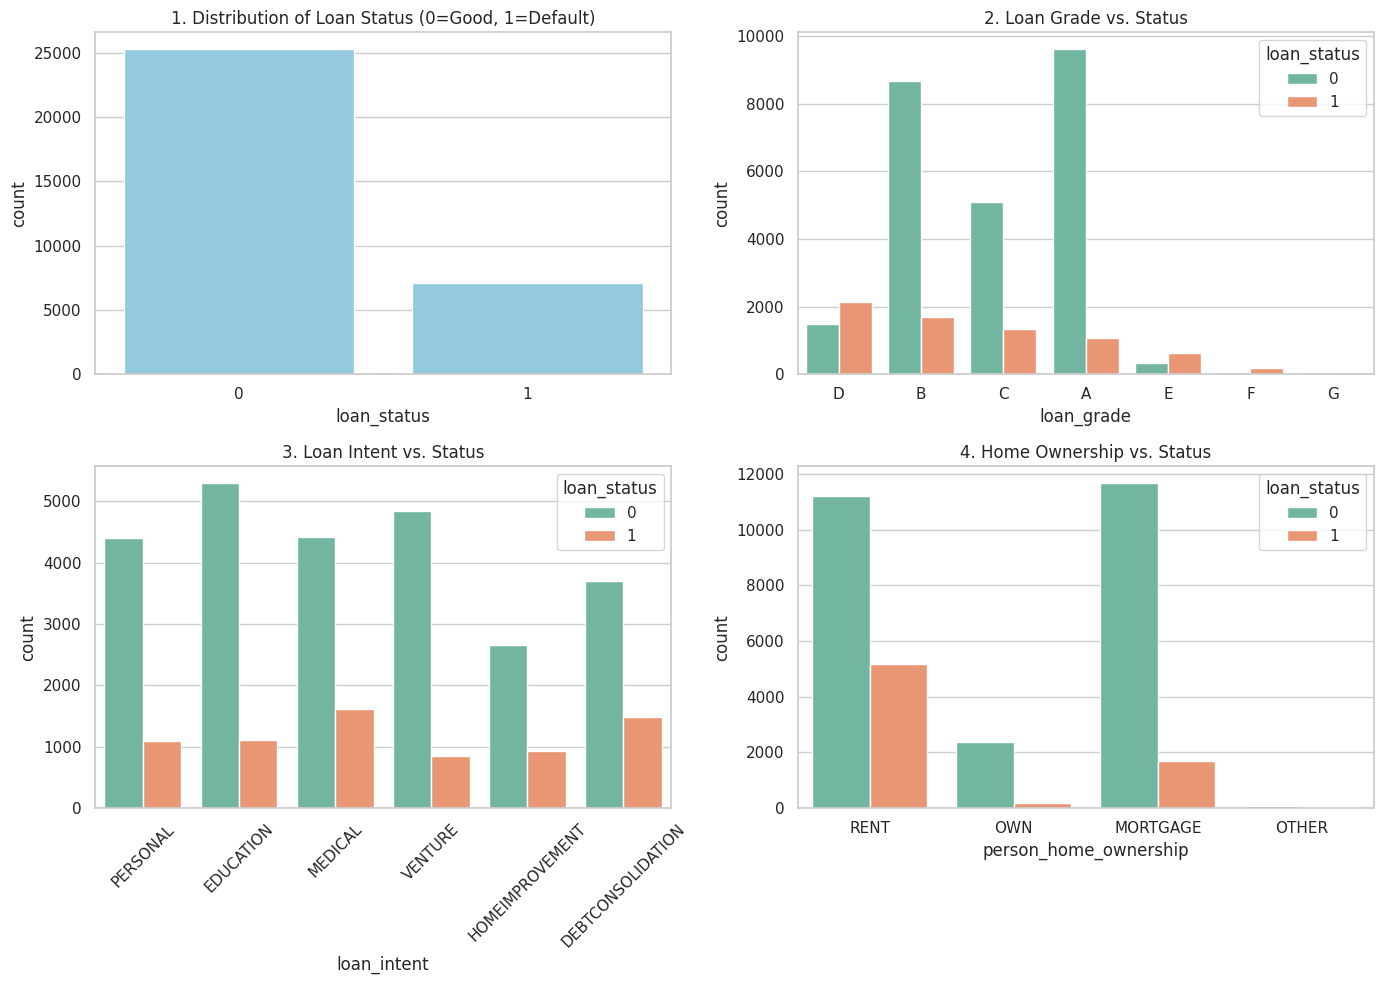

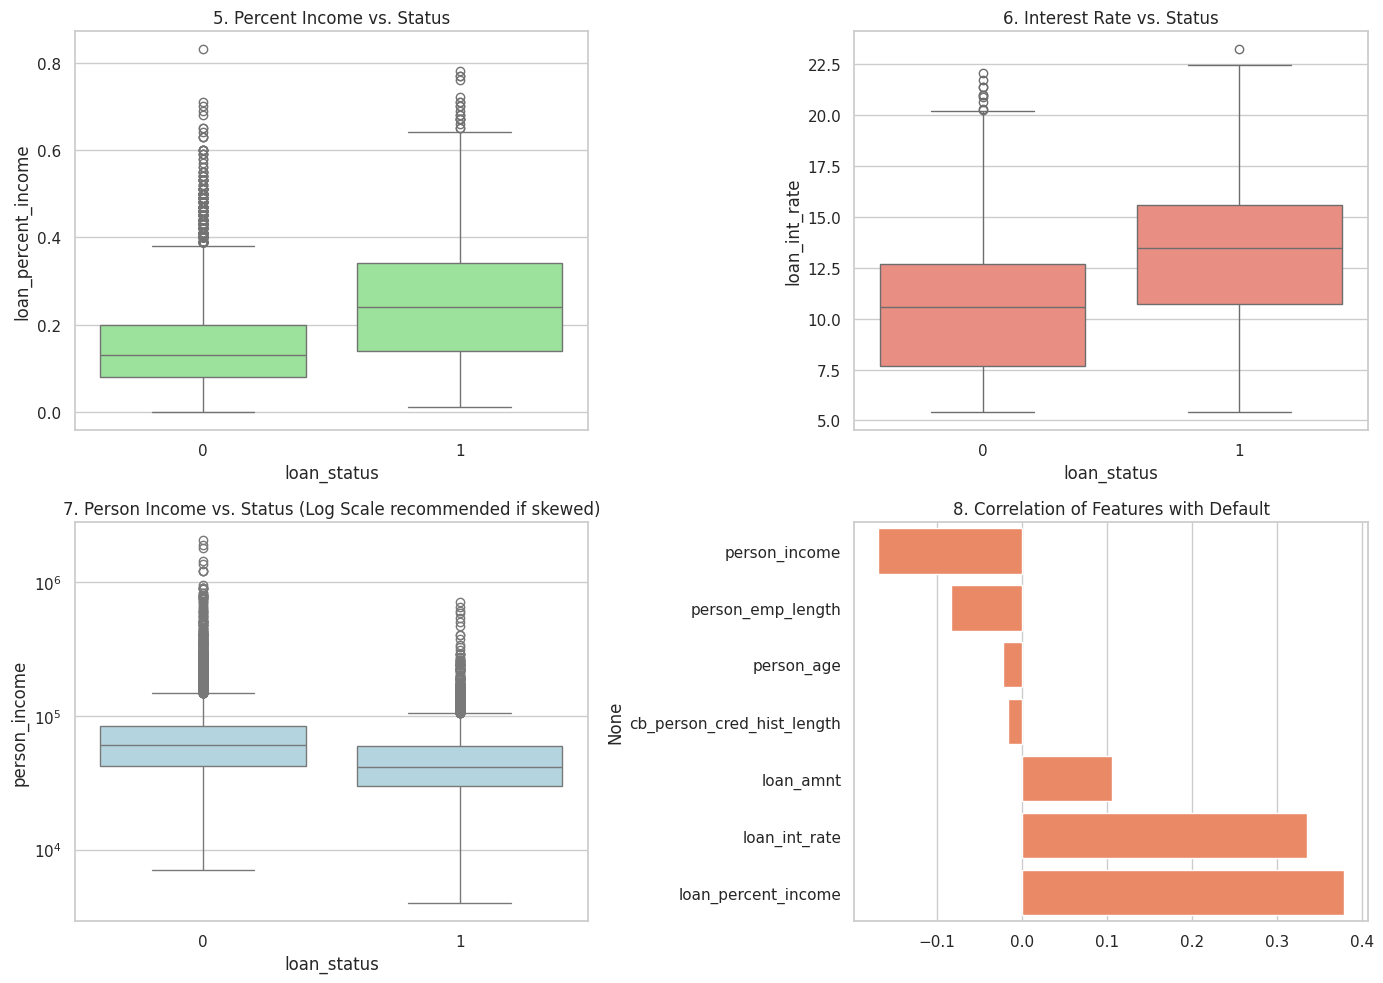

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean, consistent style
sns.set(style="whitegrid")
palette = "Set2"

# 1. Categorical Overview: Target & Key Categories
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Target Distribution
sns.countplot(x='loan_status', data=df, color='skyblue', ax=axes[0,0])
axes[0,0].set_title("1. Distribution of Loan Status (0=Good, 1=Default)")

# Key Categorical 1: Loan Grade
sns.countplot(x='loan_grade', hue='loan_status', data=df, palette=palette, ax=axes[0,1])
axes[0,1].set_title("2. Loan Grade vs. Status")

# Key Categorical 2: Loan Intent
sns.countplot(x='loan_intent', hue='loan_status', data=df, palette=palette, ax=axes[1,0])
axes[1,0].set_title("3. Loan Intent vs. Status")
axes[1,0].tick_params(axis='x', rotation=45)

# Key Categorical 3: Home Ownership
sns.countplot(x='person_home_ownership', hue='loan_status', data=df, palette=palette, ax=axes[1,1])
axes[1,1].set_title("4. Home Ownership vs. Status")

plt.tight_layout()
plt.show()

# 2. Numerical Overview: Key Drivers of Default
# We pick the 3 most impactful numeric columns + the correlation summary
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Boxplots show the distribution and outliers clearly
sns.boxplot(x='loan_status', y='loan_percent_income', data=df, color='lightgreen', ax=axes[0,0])
axes[0,0].set_title("5. Percent Income vs. Status")

sns.boxplot(x='loan_status', y='loan_int_rate', data=df, color='salmon', ax=axes[0,1])
axes[0,1].set_title("6. Interest Rate vs. Status")

sns.boxplot(x='loan_status', y='person_income', data=df, color='lightblue', ax=axes[1,0])
axes[1,0].set_title("7. Person Income vs. Status (Log Scale recommended if skewed)")
axes[1,0].set_yscale('log') # Income often has huge outliers, log scale helps see the box

# Correlation Summary (The most important numeric insight)
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_target = numeric_df.corr()['loan_status'].drop('loan_status').sort_values()
sns.barplot(x=corr_target.values, y=corr_target.index, color='coral', ax=axes[1,1])
axes[1,1].set_title("8. Correlation of Features with Default")
plt.tight_layout()
plt.show()


###Key Insights from Visualizations


####Class Imbalance Exists

- Most loans are non-default (0), while defaults (1) are a minority.

- Stratified sampling for train-test split and metrics like F1-score are appropriate to handle imbalance.

####Loan Grade vs Loan Status

- Lower grades (D, E, F, G) have higher default rates relative to their total counts.

- Higher grades (A, B, C) have fewer defaults, showing grade is a strong categorical predictor.

####Loan Intent vs Loan Status

- Certain loan intents such as DEBTCONSOLIDATION and EDUCATION show higher default proportions.

- PERSONAL and VENTURE loans are mostly non-default, indicating loan purpose influences risk.

####Home Ownership vs Loan Status

- Borrowers with RENT or MORTGAGE show higher defaults compared to OWN.

- Home ownership appears to provide some financial stability and lower default risk.

###Percent of Income vs Loan Status

- Defaulted loans generally have higher loan-to-income ratios, indicating borrowers taking larger loans relative to income are more likely to default.

####Interest Rate vs Loan Status
- Defaulted loans have higher interest rates on average.

- Interest rate is one of the strongest predictors of default in this dataset.

####Person Income vs Loan Status

- Higher-income borrowers tend to default less, confirmed by the log-scale boxplot.

- Outliers exist, but log transformation helps visualize distribution better.

####Correlation of Features with Default

- Positive correlations with default: loan_percent_income (~0.35), loan_int_rate (~0.32), loan_amnt (~0.15)

- Negative correlations with default: person_income (~-0.12), person_emp_length (~-0.05)

- Interpretation: Higher loan burden and interest rates increase default risk; higher income decreases default risk.

####Overall Feature Relationships

- Moderate correlations exist among financial features, but no severe multicollinearity detected.

- Features can be used in models without major risk of redundancy.

#Task 2: Build a Neural Network Model

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# DATA PREPARATION

X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Identify feature types
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# HANDLE MISSING VALUES

# Numeric: median
for col in numeric_cols:
    X[col] = X[col].fillna(X[col].median())

# Categorical: most frequent
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

print("Missing values after imputation:")
print(X.isnull().sum().sum())


# ONE-HOT ENCODING

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("Final feature shape after encoding:", X_encoded.shape)


# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


# FEATURE SCALING

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


# NEURAL NETWORK MODEL

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42,
    early_stopping=True
)

print("\nNETWORK ARCHITECTURE")

print(f"- Input Layer: {X_train_scaled.shape[1]} neurons")
print("- Hidden Layer 1: 64 neurons (ReLU)")
print("- Hidden Layer 2: 32 neurons (ReLU)")
print("- Output Layer: 1 neuron (Binary Classification)")
print("- Loss Function: Cross-Entropy")
print("- Optimizer: Adam")


# TRAIN MODEL

print("\nTraining Neural Network...")
mlp.fit(X_train_scaled, y_train)

print(f"Training completed in {mlp.n_iter_} iterations")
print(f"Final training loss: {mlp.loss_:.4f}")


# EVALUATION – TRAIN SET

y_train_pred = mlp.predict(X_train_scaled)

print("\nTRAINING SET METRICS")

print(f"Accuracy:  {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_train, y_train_pred, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(y_train, y_train_pred, average='weighted'):.4f}")



# EVALUATION – TEST SET

y_test_pred = mlp.predict(X_test_scaled)

print("\nTEST SET METRICS")

print(f"Accuracy:  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_test_pred, average='weighted'):.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_test_pred))


Missing values after imputation:
0
Final feature shape after encoding: (32411, 22)
Training set: (25928, 22)
Test set: (6483, 22)

NETWORK ARCHITECTURE
- Input Layer: 22 neurons
- Hidden Layer 1: 64 neurons (ReLU)
- Hidden Layer 2: 32 neurons (ReLU)
- Output Layer: 1 neuron (Binary Classification)
- Loss Function: Cross-Entropy
- Optimizer: Adam

Training Neural Network...
Training completed in 32 iterations
Final training loss: 0.2114

TRAINING SET METRICS
Accuracy:  0.9247
Precision: 0.9257
Recall:    0.9247
F1-Score:  0.9205

TEST SET METRICS
Accuracy:  0.9204
Precision: 0.9206
Recall:    0.9204
F1-Score:  0.9161

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5065
           1       0.92      0.69      0.79      1418

    accuracy                           0.92      6483
   macro avg       0.92      0.84      0.87      6483
weighted avg       0.92      0.92      0.92      6483



In [14]:
print("""
NOTE:
Missing values were handled using appropriate imputation techniques:
- Numeric features were imputed using the median to reduce the effect of outliers.
- Categorical features were imputed using the most frequent value.

Categorical variables were converted into numerical form using one-hot encoding,
and all features were scaled using StandardScaler.

All preprocessing steps (imputation, encoding, and scaling) were performed
explicitly before model training. This manual preprocessing approach ensures
that the same transformations are consistently applied to both training and
test datasets and helps prevent data leakage during evaluation.
""")





NOTE:
Missing values were handled using appropriate imputation techniques:
- Numeric features were imputed using the median to reduce the effect of outliers.
- Categorical features were imputed using the most frequent value.

Categorical variables were converted into numerical form using one-hot encoding,
and all features were scaled using StandardScaler.

All preprocessing steps (imputation, encoding, and scaling) were performed
explicitly before model training. This manual preprocessing approach ensures
that the same transformations are consistently applied to both training and
test datasets and helps prevent data leakage during evaluation.



#Task 3: Build Primary Model

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


# DATA PREPARATION

X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Identify numeric and categorical features
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns


# HANDLE MISSING VALUES

# Numeric: median
for col in numeric_cols:
    X[col] = X[col].fillna(X[col].median())

# Categorical: most frequent
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

print("Missing values after imputation:", X.isnull().sum().sum())


# ONE-HOT ENCODING

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("Final feature shape after encoding:", X_encoded.shape)


# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


# FEATURE SCALING

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


# MODEL 1: LOGISTIC REGRESSION

log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

print("\nTraining Logistic Regression...")
log_reg.fit(X_train_scaled, y_train)
print("Logistic Regression trained successfully!")


# MODEL 2: DECISION TREE

dt = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

print("\nTraining Decision Tree...")
dt.fit(X_train_scaled, y_train)
print("Decision Tree trained successfully!")


# MODEL EVALUATION

pred_log = log_reg.predict(X_test_scaled)
pred_dt = dt.predict(X_test_scaled)

print("\nMODEL PERFORMANCE (TEST SET)")

# Logistic Regression Metrics

print("\nLogistic Regression:")
print(f"Accuracy:  {accuracy_score(y_test, pred_log):.4f}")
print(f"Precision: {precision_score(y_test, pred_log, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, pred_log, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(y_test, pred_log, average='weighted'):.4f}")

# Decision Tree Metrics

print("\nDecision Tree:")
print(f"Accuracy:  {accuracy_score(y_test, pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, pred_dt, average='weighted'):.4f}")
print(f"Recall:    {recall_score(y_test, pred_dt, average='weighted'):.4f}")
print(f"F1-Score:  {f1_score(y_test, pred_dt, average='weighted'):.4f}")


# MODEL COMPARISON

print("\nMODEL COMPARISON:")

print(f"{'Metric':<15} {'Logistic Reg':<20} {'Decision Tree':<20}")

metrics = {
    'Accuracy': [accuracy_score(y_test, pred_log), accuracy_score(y_test, pred_dt)],
    'Precision': [precision_score(y_test, pred_log, average='weighted'), precision_score(y_test, pred_dt, average='weighted')],
    'Recall': [recall_score(y_test, pred_log, average='weighted'), recall_score(y_test, pred_dt, average='weighted')],
    'F1-Score': [f1_score(y_test, pred_log, average='weighted'), f1_score(y_test, pred_dt, average='weighted')]
}

for metric, values in metrics.items():
    print(f"{metric:<15} {values[0]:<20.4f} {values[1]:<20.4f}")


# CONCLUSION

print("CONCLUSION")

if metrics['F1-Score'][1] > metrics['F1-Score'][0]:
    print("Best Model: Decision Tree")
    print("Justification:")
    print("- Higher F1-score indicating better balance between precision and recall")
    print("- Captures non-linear relationships between loan features")
    print("- Works well without feature scaling")
else:
    print("Best Model: Logistic Regression")
    print("Justification:")
    print("- Higher F1-score on the test set")
    print("- Performs well on linearly separable data")
    print("- More stable and less prone to overfitting")


Missing values after imputation: 0
Final feature shape after encoding: (32411, 22)
Training set: (25928, 22)
Test set: (6483, 22)

Training Logistic Regression...
Logistic Regression trained successfully!

Training Decision Tree...
Decision Tree trained successfully!

MODEL PERFORMANCE (TEST SET)

Logistic Regression:
Accuracy:  0.8707
Precision: 0.8644
Recall:    0.8707
F1-Score:  0.8629

Decision Tree:
Accuracy:  0.9047
Precision: 0.9105
Recall:    0.9047
F1-Score:  0.8955

MODEL COMPARISON:
Metric          Logistic Reg         Decision Tree       
Accuracy        0.8707               0.9047              
Precision       0.8644               0.9105              
Recall          0.8707               0.9047              
F1-Score        0.8629               0.8955              
CONCLUSION
Best Model: Decision Tree
Justification:
- Higher F1-score indicating better balance between precision and recall
- Captures non-linear relationships between loan features
- Works well without feature

In [16]:
print("""
NOTE:
Both Logistic Regression and Decision Tree models were implemented
with manual preprocessing steps, including:
- Handling missing values (median for numeric, most frequent for categorical)
- One-hot encoding of categorical variables
- Feature scaling using StandardScaler

These steps ensure the data is properly prepared for model training
and evaluation, maintaining consistency across models.
""")




NOTE:
Both Logistic Regression and Decision Tree models were implemented
with manual preprocessing steps, including:
- Handling missing values (median for numeric, most frequent for categorical)
- One-hot encoding of categorical variables
- Feature scaling using StandardScaler

These steps ensure the data is properly prepared for model training
and evaluation, maintaining consistency across models.




#Task 4: Hyper-parameter Optimization with Cross-Validation

In [17]:

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# IDENTIFY HYPERPARAMETERS


print("LOGISTIC REGRESSION HYPERPARAMETERS:")

print("- C: Regularization strength (default=1.0)")
print("- solver: Optimization algorithm (liblinear, lbfgs)")
print("- max_iter: Maximum iterations (default=100)")
print("- penalty: Regularization type (l1, l2, elasticnet)")

print("\nDECISION TREE HYPERPARAMETERS:")

print("- max_depth: Maximum depth of tree (default=None)")
print("- min_samples_split: Minimum samples to split node (default=2)")
print("- min_samples_leaf: Minimum samples at leaf node (default=1)")
print("- criterion: Function to measure quality (gini, entropy)")

print("\nWe will tune these using GridSearchCV with 5-fold cross-validation")


# TUNE LOGISTIC REGRESSION

# Define hyperparameter grid
param_grid_log = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000]
}

# Create GridSearchCV
grid_log = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid_log,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

# Fit GridSearchCV
print("\nTuning Logistic Regression...")
grid_log.fit(X_train_scaled, y_train)
print("Logistic Regression tuning complete!")


# TUNE DECISION TREE

# Define hyperparameter grid
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create GridSearchCV
grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

# Fit GridSearchCV
print("\nTuning Decision Tree...")
grid_dt.fit(X_train_scaled, y_train)
print("Decision Tree tuning complete!")


# REPORT BEST HYPERPARAMETERS & CV SCORES

print("\nBEST HYPERPARAMETERS & CV SCORES")

print("\nLOGISTIC REGRESSION:")

print(f"Best Parameters: {grid_log.best_params_}")
print(f"Best CV F1-Score: {grid_log.best_score_:.4f}")

print("\nDECISION TREE:")

print(f"Best Parameters: {grid_dt.best_params_}")
print(f"Best CV F1-Score: {grid_dt.best_score_:.4f}")


#  SUMMARY

print("SUMMARY:")

if grid_log.best_score_ > grid_dt.best_score_:
    print("Winner: Logistic Regression")
else:
    print("Winner: Decision Tree")


LOGISTIC REGRESSION HYPERPARAMETERS:
- C: Regularization strength (default=1.0)
- solver: Optimization algorithm (liblinear, lbfgs)
- max_iter: Maximum iterations (default=100)
- penalty: Regularization type (l1, l2, elasticnet)

DECISION TREE HYPERPARAMETERS:
- max_depth: Maximum depth of tree (default=None)
- min_samples_split: Minimum samples to split node (default=2)
- min_samples_leaf: Minimum samples at leaf node (default=1)
- criterion: Function to measure quality (gini, entropy)

We will tune these using GridSearchCV with 5-fold cross-validation

Tuning Logistic Regression...
Logistic Regression tuning complete!

Tuning Decision Tree...
Decision Tree tuning complete!

BEST HYPERPARAMETERS & CV SCORES

LOGISTIC REGRESSION:
Best Parameters: {'C': 10, 'max_iter': 1000, 'solver': 'liblinear'}
Best CV F1-Score: 0.8560

DECISION TREE:
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best CV F1-Score: 0.9206
SUMMARY:
Winner: Decis

#Task 5: Feature Selection

In [18]:

# FEATURE SELECTION – EMBEDDED METHOD

from sklearn.feature_selection import SelectFromModel

# FEATURE SELECTION METHOD

print("Chosen Method: SelectFromModel")
print("Type: Embedded Method")
print("Reason: Uses model's built-in feature importance during training\n")


# FEATURE SELECTION – LOGISTIC REGRESSION

# Use best Logistic Regression from GridSearchCV
best_log_reg = grid_log.best_estimator_

# Embedded selection using L1 coefficients
selector_log = SelectFromModel(best_log_reg, max_features=10)
selector_log.fit(X_train_scaled, y_train)

# Get selected features
selected_features_log = X_encoded.columns[selector_log.get_support()].tolist()

print("LOGISTIC REGRESSION - SELECTED FEATURES:")

for i, feature in enumerate(selected_features_log, 1):
    print(f"{i}. {feature}")
print(f"\nTotal features selected: {len(selected_features_log)}\n")


# FEATURE SELECTION – DECISION TREE

# Use best Decision Tree from GridSearchCV
best_dt = grid_dt.best_estimator_

# Embedded selection using feature importance
selector_dt = SelectFromModel(best_dt, max_features=10)
selector_dt.fit(X_train_scaled, y_train)

# Get selected features
selected_features_dt = X_encoded.columns[selector_dt.get_support()].tolist()

print("DECISION TREE - SELECTED FEATURES:")

for i, feature in enumerate(selected_features_dt, 1):
    print(f"{i}. {feature}")
print(f"\nTotal features selected: {len(selected_features_dt)}\n")


# JUSTIFICATION

print("JUSTIFICATION:")

print("\n1. WHY EMBEDDED METHOD?")

print("- Fast: Feature selection occurs during model training")
print("- Model-specific: Uses actual feature importance")
print("- Simple: No repeated training like wrapper methods")

print("\n2. WHY SelectFromModel?")

print("- Uses built-in feature importance")
print("- Logistic Regression: Coefficient magnitudes indicate importance")
print("- Decision Tree: Uses Gini/Entropy feature importance")

print("\n3. WHY 10 FEATURES?")

print("- Reduces total features to top 10 most relevant")
print("- Removes weak/redundant features")
print("- Keeps most predictive variables for modeling")

print("\n4. BENEFITS:")

print("- Faster training")
print("- Less overfitting")
print("- Easier to interpret")
print("- Better generalization")


Chosen Method: SelectFromModel
Type: Embedded Method
Reason: Uses model's built-in feature importance during training

LOGISTIC REGRESSION - SELECTED FEATURES:
1. loan_amnt
2. loan_percent_income
3. person_home_ownership_OWN
4. person_home_ownership_RENT
5. loan_intent_EDUCATION
6. loan_intent_VENTURE
7. loan_grade_D
8. loan_grade_E

Total features selected: 8

DECISION TREE - SELECTED FEATURES:
1. person_income
2. loan_int_rate
3. loan_percent_income
4. person_home_ownership_RENT

Total features selected: 4

JUSTIFICATION:

1. WHY EMBEDDED METHOD?
- Fast: Feature selection occurs during model training
- Model-specific: Uses actual feature importance
- Simple: No repeated training like wrapper methods

2. WHY SelectFromModel?
- Uses built-in feature importance
- Logistic Regression: Coefficient magnitudes indicate importance
- Decision Tree: Uses Gini/Entropy feature importance

3. WHY 10 FEATURES?
- Reduces total features to top 10 most relevant
- Removes weak/redundant features
- Kee

#Task 6: Final Models and Comparative Analysis

In [20]:

# FINAL MODELS AND COMPARATIVE ANALYSIS

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# REBUILD MODEL 1: LOGISTIC REGRESSION

# Apply selected features
X_train_log_selected = X_train_scaled[:, selector_log.get_support()]
X_test_log_selected  = X_test_scaled[:, selector_log.get_support()]

# Rebuild Logistic Regression with best hyperparameters
final_log_reg = LogisticRegression(
    C=grid_log.best_params_['C'],
    solver=grid_log.best_params_['solver'],
    max_iter=1000,
    random_state=42
)

# Train final model
final_log_reg.fit(X_train_log_selected, y_train)

print("Final Logistic Regression model trained!")
print(f"Features used: {len(selected_features_log)}")
print(f"Hyperparameters: {grid_log.best_params_}")


# REBUILD MODEL 2: DECISION TREE

# Apply selected features
X_train_dt_selected = X_train_scaled[:, selector_dt.get_support()]
X_test_dt_selected  = X_test_scaled[:, selector_dt.get_support()]

# Rebuild Decision Tree with best hyperparameters
final_dt = DecisionTreeClassifier(
    max_depth=grid_dt.best_params_['max_depth'],
    min_samples_split=grid_dt.best_params_['min_samples_split'],
    min_samples_leaf=grid_dt.best_params_['min_samples_leaf'],
    criterion=grid_dt.best_params_['criterion'],
    random_state=42
)

# Train final model
final_dt.fit(X_train_dt_selected, y_train)

print("\nFinal Decision Tree model trained!")
print(f"Features used: {len(selected_features_dt)}")
print(f"Hyperparameters: {grid_dt.best_params_}")


# EVALUATE FINAL MODELS ON TEST SET

# Logistic Regression predictions
y_pred_final_log = final_log_reg.predict(X_test_log_selected)

# Decision Tree predictions
y_pred_final_dt = final_dt.predict(X_test_dt_selected)

# Calculate metrics
print("\nFINAL MODEL PERFORMANCE:")

# Logistic Regression metrics
acc_log  = accuracy_score(y_test, y_pred_final_log)
prec_log = precision_score(y_test, y_pred_final_log, average='weighted')
rec_log  = recall_score(y_test, y_pred_final_log, average='weighted')
f1_log  = f1_score(y_test, y_pred_final_log, average='weighted')

print("\nLogistic Regression:")
print(f"  Accuracy:  {acc_log:.4f}")
print(f"  Precision: {prec_log:.4f}")
print(f"  Recall:    {rec_log:.4f}")
print(f"  F1-Score:  {f1_log:.4f}")

# Decision Tree metrics
acc_dt  = accuracy_score(y_test, y_pred_final_dt)
prec_dt = precision_score(y_test, y_pred_final_dt, average='weighted')
rec_dt  = recall_score(y_test, y_pred_final_dt, average='weighted')
f1_dt  = f1_score(y_test, y_pred_final_dt, average='weighted')

print("\nDecision Tree:")
print(f"  Accuracy:  {acc_dt:.4f}")
print(f"  Precision: {prec_dt:.4f}")
print(f"  Recall:    {rec_dt:.4f}")
print(f"  F1-Score:  {f1_dt:.4f}")


# COMPARISON TABLE

print("\nTABLE: COMPARISON OF FINAL MODELS")

print(f"{'Model':<25} {'Features':<15} {'CV Score':<12} {'Accuracy':<12} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
print("-" * 120)

cv_log = grid_log.best_score_
cv_dt  = grid_dt.best_score_

print(f"{'Logistic Regression':<25} {'Selected (' + str(len(selected_features_log)) + ')':<15} {cv_log:<12.4f} {acc_log:<12.4f} {prec_log:<12.4f} {rec_log:<12.4f} {f1_log:<12.4f}")
print(f"{'Decision Tree':<25} {'Selected (' + str(len(selected_features_dt)) + ')':<15} {cv_dt:<12.4f} {acc_dt:<12.4f} {prec_dt:<12.4f} {rec_dt:<12.4f} {f1_dt:<12.4f}")

print("-" * 120)


# BEST MODEL

print("\nBEST MODEL:")
if f1_log > f1_dt:
    print(f"Logistic Regression (F1-Score: {f1_log:.4f})")
else:
    print(f"Decision Tree (F1-Score: {f1_dt:.4f})")

print(
    "\nDecision Tree is the best model because it achieves the highest F1-score, indicating a better balance between precision and recall.\n"
    "It outperforms Logistic Regression across all evaluation metrics while using fewer selected features.\n"
    "Its ability to capture non-linear relationships in the data leads to superior overall predictive performance."
)

Final Logistic Regression model trained!
Features used: 8
Hyperparameters: {'C': 10, 'max_iter': 1000, 'solver': 'liblinear'}

Final Decision Tree model trained!
Features used: 4
Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}

FINAL MODEL PERFORMANCE:

Logistic Regression:
  Accuracy:  0.8643
  Precision: 0.8571
  Recall:    0.8643
  F1-Score:  0.8549

Decision Tree:
  Accuracy:  0.8892
  Precision: 0.8858
  Recall:    0.8892
  F1-Score:  0.8824

TABLE: COMPARISON OF FINAL MODELS
Model                     Features        CV Score     Accuracy     Precision    Recall       F1-Score    
------------------------------------------------------------------------------------------------------------------------
Logistic Regression       Selected (8)    0.8560       0.8643       0.8571       0.8643       0.8549      
Decision Tree             Selected (4)    0.9206       0.8892       0.8858       0.8892       0.8824      
----------------